In [1]:
# imports
import matplotlib as plt
plt.rcParams['animation.ffmpeg_path'] = '/camp/apps/eb/software/FFmpeg/4.1-foss-2018b/bin/ffmpeg'
%matplotlib inline
import os
import cv2
import numpy as np
from scipy.spatial.transform import Rotation
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path

In [6]:
# find the data
data_root = Path('/camp/lab/znamenskiyp/data/instruments/raw_data/projects/blota_onix_pilote/')
save_root = Path('/camp/lab/znamenskiyp/home/shared/projects/blota_onix_calibration/')
folder = 'minicamera_tests'
data_root = data_root / folder
save_root = save_root / folder

(400.0, 200.0)

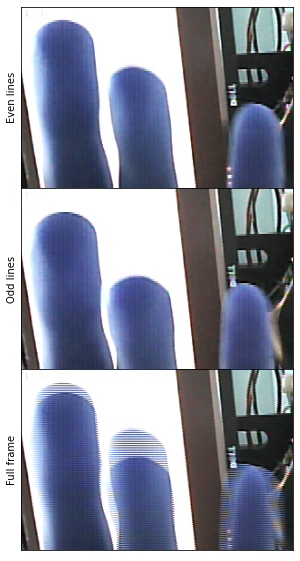

In [60]:
camera_file = 'camera_test5_timing.avi'
timestamps =  pd.read_csv(data_root / 'camera_timestamp_harp.csv', header=None)
frame = 101

cam_data = cv2.VideoCapture(str(data_root / camera_file))
nframes = int(cam_data.get(cv2.CAP_PROP_FRAME_COUNT))

cam_data.set(cv2.CAP_PROP_POS_FRAMES, frame-1)
ret, img = cam_data.read()

fig, axes = plt.subplots(3,1, sharex=True, sharey=True)
fig.set_size_inches(5,10)
axes[2].imshow(img)
axes[2].set_ylabel('Full frame')
for i in range(2):
    img1 = np.zeros_like(img)
    for j in range(2):
        img1[j::2,:,:] = img[i::2,:,:]
    axes[2 - (i+1)].imshow(img1)
    axes[2 - (i+1)].set_ylabel('%s lines' % ('Even' if i else 'Odd'))

for x in axes:
    x.set_yticks([])
    x.set_xticks([])
fig.subplots_adjust(hspace=0)
axes[0].set_xlim([150, 450])
axes[0].set_ylim([400, 200])

In [18]:
os.listdir(data_root)

['side_view.PNG',
 'camera_test5_timing.avi',
 '3dview.PNG',
 'camera_timestamp_harp.csv',
 'camera_test1.avi',
 'frame_start.PNG',
 'topview.PNG',
 'frame_rate.PNG',
 'camera2_test0.png',
 'camera_test1.png',
 'frontview.PNG']